# Converts emojis to TEXT, column DataFrame


In [29]:
pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 35.1 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.3 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import emoji
import re
import unidecode
from nltk.corpus import stopwords
import nltk


### CSV reading

### BE SURE TO CHANGE THE COLUMN NAME TO CORRECT NAME

In [42]:
import chardet

# Detecta la codificación del archivo
rawdata = open(csv_path, 'rb').read()
result = chardet.detect(rawdata)
print(result)


{'encoding': 'MacRoman', 'confidence': 0.6593872389603059, 'language': ''}


In [81]:
csv_path = '/Users/tadeonava/Downloads/Moose Tracks/Graeters dataset_instagram-comment-scraper_2025-04-22_23-16-29-276.csv'
df = pd.read_csv(csv_path)

In [83]:
text = df['text']

### Null Treatement

In [84]:
# Contar cuántos valores NaN (nulos) hay en la columna 'text'
na_count = text.isna().sum()
print(f'Valores nulos en la columna "text": {na_count}')
print('Valores no nulos:',df['text'].notna().sum())
print('Total:',len(text))

Valores nulos en la columna "text": 34
Valores no nulos: 2895
Total: 2929


In [85]:
df['text'] = text.fillna('no_text').astype(str)

### Word filtering to ignore special characters and convert emojis to words

In [86]:
'''
import nltk.data
nltk.data.path.append("/Users/tadeonava/Downloads/stopwords.zip")  # Ajustá según tu ruta real

from nltk.corpus import stopwords
stopwords.words('english')  # Ahora debería funcionar

'''


# Alternativa sin NLTK
stopwords_en = set("""
a about above after again against all am an and any are aren't as at
be because been before being below between both but by can't cannot could
couldn't did didn't do does doesn't doing don't down during each few for
from further had hadn't has hasn't have haven't having he he'd he'll he's
her here here's hers herself him himself his how how's i i'd i'll i'm i've
if in into is isn't it it's its itself let's me more most mustn't my
myself no nor not of off on once only or other ought our ours ourselves
out over own same shan't she she'd she'll she's should shouldn't so some
such than that that's the their theirs them themselves then there there's
these they they'd they'll they're they've this those through to too under
until up very was wasn't we we'd we'll we're we've were weren't what
what's when when's where where's which while who who's whom why why's will
with won't would wouldn't you you'd you'll you're you've your yours
yourself yourselves
""".split())


def clean_post(text):
    if not isinstance(text, str):
        return ""

    # 1. Convert emojis to text
    text = emoji.demojize(text, delimiters=(" ", " "))
    
    # 2. Quit URLs
    text = re.sub(r"http\S+|www.\S+", "", text)
    
    # 3. Eliminar caracteres especiales, pero mantener letras, números, espacios, dos puntos y guiones bajos
    text = re.sub(r"[^a-zA-Z0-9\s:_]", "", text)  
    
    # 4. Convert to lowecase and quit tilds
    text = text.lower()
    text = unidecode.unidecode(text)
    
    # 5. Tokenize and quit stopword
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords_en and len(t) > 2]
    
    return " ".join(tokens)

# Comprobe that function is working correctly
text = "OPEN 7 DAYS A WEEK *** Please come to buy our food 😀"
cleaned_text = clean_post(text)
print(cleaned_text)


open days week please come buy food grinning_face


#### Add column to DataFrame

In [87]:
df['clean_posts'] = df['text'].apply(clean_post)

#### Comprobe well performance

In [90]:
print(df['text'][1])
print(df['clean_posts'][1])

Omgggg are yall tired of dropping collab after collab yet?! 🤭
omgggg yall tired dropping collab collab yet face_with_hand_over_mouth


## Clustering 

### Filtering "no_text" values to avoid noise in clustering

In [91]:
# Filtrar el DataFrame para eliminar las filas donde 'clean_posts' tiene el valor "no_text"
df_filtered = df[df['clean_posts'] != 'no_text']

# Ahora procederemos con la vectorización de texto solo con los posts no nulos o con 'no_text'
corpus = df_filtered['clean_posts'].astype(str)



### Convertir palabras a números, matriz TF-IDF

In [92]:
# Vectorización con TF-IDF
vectorizer = TfidfVectorizer(stop_words=None, max_features=1000)  # Puedes ajustar max_features (palabras que toma el modelo) si es necesario
X = vectorizer.fit_transform(corpus)

### HDBSCAN 

In [85]:
pip install umap-learn


  Using cached umap_learn-0.5.7-py3-none-any.whl.metadata (21 kB)
  Using cached numba-0.61.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.8 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
  Using cached llvmlite-0.44.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (4.8 kB)
Using cached umap_learn-0.5.7-py3-none-any.whl (88 kB)
Using cached numba-0.61.2-cp311-cp311-macosx_11_0_arm64.whl (2.8 MB)
Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)
Using cached llvmlite-0.44.0-cp311-cp311-macosx_11_0_arm64.whl (26.2 MB)
Note: you may need to restart the kernel to use updated packages.


/var/folders/lh/k_ftm6zs6s7d3lhpy8ybqnj00000gp/T/ipykernel_28185/2356346108.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'cluster'] = cluster_labels  # Usamos .loc para evitar el SettingWithCopyWarning


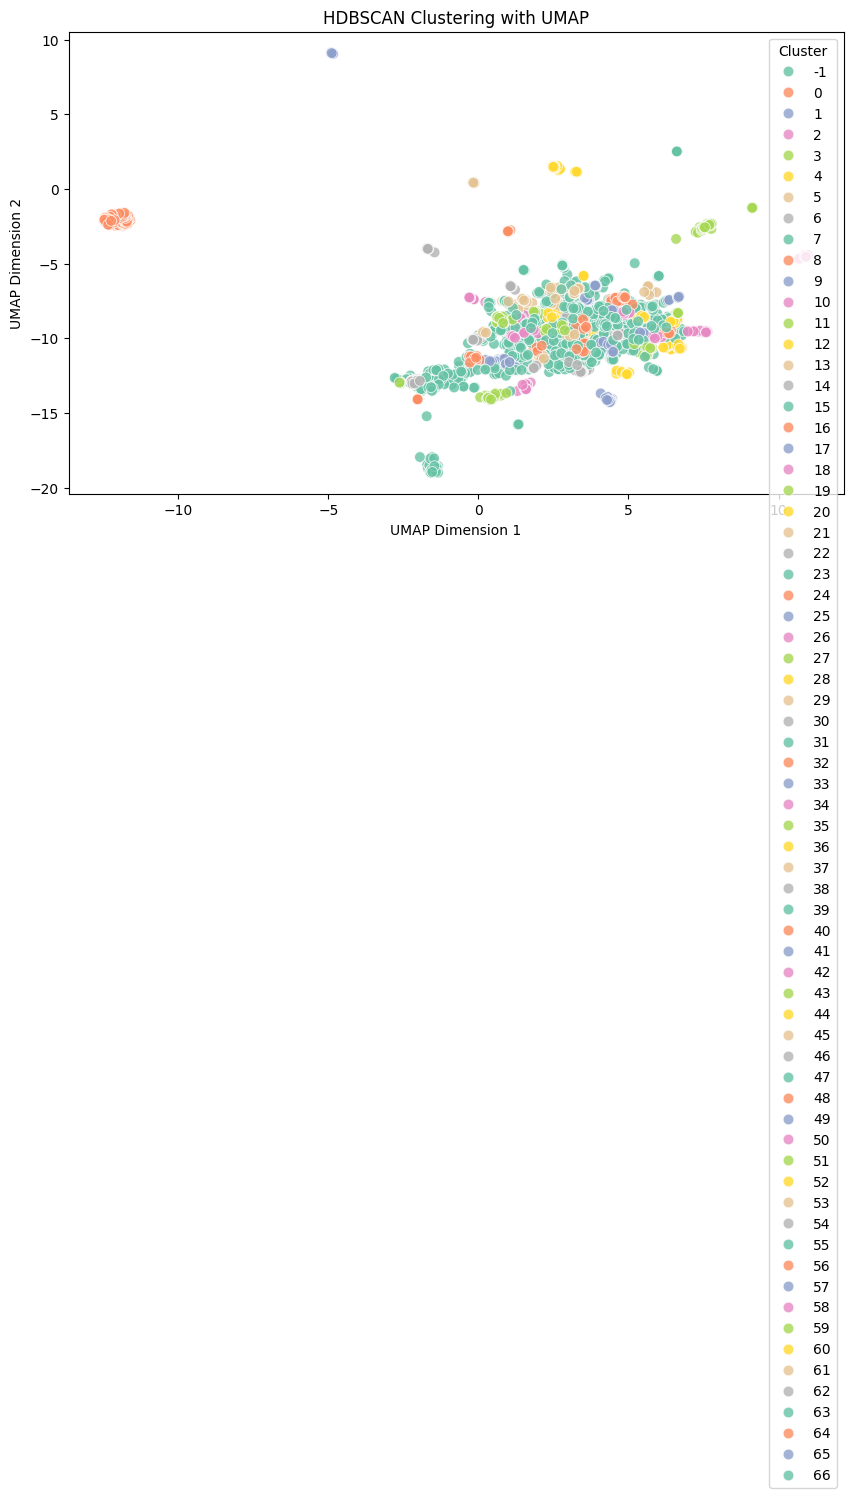


Cluster 0: ['ceebrittttt', 'danielpierce8458', 'coke', 'annaroseinbloom', 'c_dubbs143', 'andrewsryan1959', 'austinrath', 'clinking_beer_mugs', 'cmyers0332024', 'amyhershberger']

Cluster 1: ['red_circle', 'blue_circle']

Cluster 2: ['yum', 'smiling_face_with_hearteyes', 'need', 'ice_cream', 'looks', 'cups', 'tryyyy', 'cream', 'instead', 'fire']

Cluster 3: ['red_heart', 'alien', 'speech_balloon', 'globe_showing_americas', 'flying_saucer', 'crown', 'smiling_face_with_hearteyes', 'graeters', 'white_heart', 'hippopotamus']

Cluster 4: ['fire', 'smiling_face_with_hearteyes', 'ice', 'cream', 'best', 'try', 'flavor', 'ohio', 'omg', 'amazing']

Cluster 5: ['face_with_open_mouth', 'omg', 'face_with_tears_of_joy', 'good', 'now', 'brittle', 'peanut', 'udfan07', 'place', 'idea']

Cluster 6: ['eyes', 'think', 'orange_heart', 'brit_deshaye', 'ooooh', 'brittanymeeks_', 'still', 'waiting', 'officialskylinechili', 'release']

Cluster 7: ['smiling_face_with_hearteyes', 'love', 'flavor', 'try', 'incred

In [93]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import hdbscan
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP


X_tfidf = X 

# Paso 2: Reducción de dimensionalidad con UMAP para visualización (opcional pero recomendable)
umap_model = UMAP(n_neighbors=30, n_components=2, min_dist=0.1, metric='cosine', random_state=42)

X_umap = umap_model.fit_transform(X_tfidf.toarray())

# Paso 3: Clustering con HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean')
cluster_labels = clusterer.fit_predict(X_umap)

# Paso 4: Añadir los clusters al DataFrame original
df_filtered.loc[:, 'cluster'] = cluster_labels  # Usamos .loc para evitar el SettingWithCopyWarning

# Paso 5: Visualización
plt.figure(figsize=(10, 6))
palette = sns.color_palette('Set2', len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0))  # Usamos una paleta de colores con suficientes colores
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=cluster_labels, palette=palette, s=60, alpha=0.8)
plt.title('HDBSCAN Clustering with UMAP')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster')
plt.show()

# Paso 6: Mostrar palabras más comunes por cluster (en listas más claras)
clusters_summary = {}

for label in sorted(df_filtered['cluster'].unique()):
    if label == -1:
        continue  # Saltar outliers
    # Crear una lista de palabras más comunes por cluster
    texts = df_filtered[df_filtered['cluster'] == label]['clean_posts']
    all_words = ' '.join(texts).split()
    freq = pd.Series(all_words).value_counts().head(10)  # Las 10 palabras más comunes
    clusters_summary[label] = freq.index.tolist()  # Guardar las palabras como listas en el diccionario

# Imprimir los clusters en formato de listas
for label, words in clusters_summary.items():
    print(f"\nCluster {label}: {words}")



### Kmeans

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# Número de clusters (ajústalo según el contexto o prueba con el codo)
num_clusters = 6

# Aplicar K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Asignar los clusters a una nueva columna en el DataFrame
df_filtered['cluster'] = kmeans.labels_

# Visualizar los primeros resultados
print(df_filtered[['clean_posts', 'cluster']].head())




                                         clean_posts  cluster
0                                      walk rain stg        3
1  omgggg yall tired dropping collab collab yet f...        3
2  yessssss raising_hands_mediumdark_skin_tone ra...        3
3                                      run ice cream        3
4                   pig tracks pig tracks pig tracks        3


/var/folders/lh/k_ftm6zs6s7d3lhpy8ybqnj00000gp/T/ipykernel_28185/420803814.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = kmeans.labels_


In [95]:
# Ver algunas muestras del cluster 
df_filtered[df_filtered['cluster'] == 1]['clean_posts'].head(10)


23                 love good please come new york city
37                    smiling_face_with_hearteyes good
105    every flavor looks like good mood drooling_face
125                  tried last night sweet soooo good
201                                               good
543                                back good chandzard
583                                               good
603                                      sooooooo good
605      legit best flavor graeters offers sooooo good
685                              sounds good expensive
Name: clean_posts, dtype: object

In [101]:
import numpy as np

# Centroides: representan los "temas" de cada cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(num_clusters):
    print(f"Cluster {i} top words:")
    top_words = [terms[ind] for ind in order_centroids[i, :20]]
    print(", ".join(top_words))
    print()


Cluster 0 top words:
drooling_face, delicious, smiling_face_with_hearteyes, sounds, yum, mouth, drooling, goodness, ok_hand_light_skin_tone, yummy, flavors, yesterday, tongue, red_heart, today, spread, trek, doughnut, annual, looks

Cluster 1 top words:
good, looks, smiling_face_with_hearteyes, tried, cream, sounds, soooo, ice, today, just, flavor, sooooo, soooooo, night, job, graeters, wow, favorite, guys, please

Cluster 2 top words:
please, yes, make, bring, back, smiling_face_with_hearteyes, can, flavor, permanent, carry, unionmarket, graeters, folded_hands, send, ice, chocolate, cream, chip, dont, line

Cluster 3 top words:
smiling_face_with_hearteyes, red_heart, fire, favorite, love, raising_hands, chip, cream, clapping_hands, chocolate, flavor, need, ice, yum, face_with_tears_of_joy, one, soft_ice_cream, face_savoring_food, eyes, raspberry

Cluster 4 top words:
best, flavor, ever, ice, cream, smiling_face_with_hearteyes, raising_hands, planet, news, fire, graeters, red_heart, ba

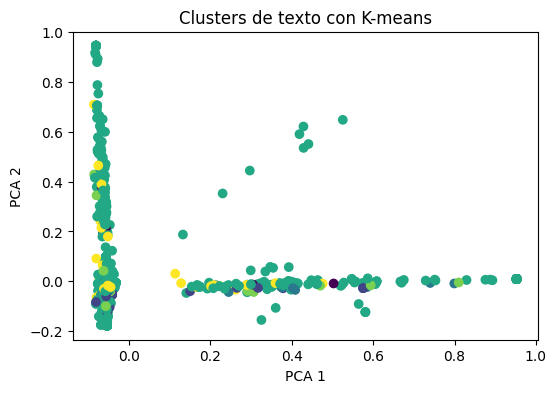

In [102]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducción de dimensiones para visualizar en 2D
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())

# Plot
colors = ['red', 'blue', 'green']
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

plt.figure(figsize=(6, 4))
plt.scatter(x_axis, y_axis, c=kmeans.labels_, cmap='viridis')
plt.title('Clusters de texto con K-means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


## Optimal cluster selection

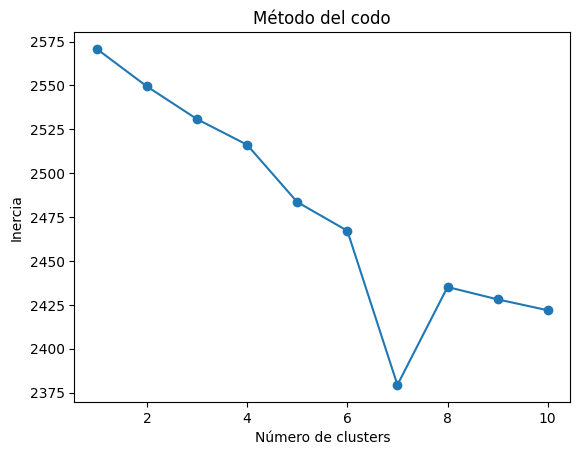

In [98]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Inercia para diferentes números de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()


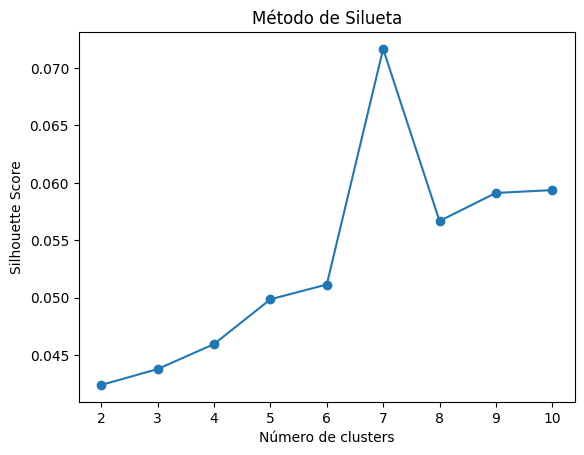

In [99]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):  # Considera valores de k entre 2 y 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sil_score = silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)

# Graficar el Silhouette Score
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Método de Silueta')
plt.show()


## Topic Modeling

In [103]:
from gensim import corpora
from gensim.models import LdaModel
from sklearn.decomposition import LatentDirichletAllocation


#### Is more efficient to convert the column cleaned to BagOfWords to implement LDA

### NOTE: You can apply topic modelling for each cluster but before you have to store clusters in tables and use them creating corpus equal to number of clusters

### pyLDAvis just for sklearn. Training

In [109]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) 
warnings.filterwarnings('ignore', category=FutureWarning) 
warnings.filterwarnings('ignore', category=UserWarning)

import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorización con CountVectorizer (recomendado para LDA)
vectorizer = CountVectorizer(strip_accents='unicode',
                              stop_words='english',
                              lowercase=True,
                              token_pattern=r'\b[a-zA-Z]{3,}\b',
                              max_df=0.5,
                              min_df=5)

X = vectorizer.fit_transform(df_filtered['clean_posts'])

# Entrenar LDA
num_topics = 4
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Visualización con pyLDAvis
vis = pyLDAvis.lda_model.prepare(lda, X, vectorizer)
pyLDAvis.display(vis)

pyLDAvis.save_html(vis, '/Users/tadeonava/Downloads/lda_vis.html')


#### See the most relevant word by topic. TRAINED

In [110]:
# Crear el diccionario y el corpus de BoW
# (Nota: si prefieres trabajar con TF-IDF, también puedes usarlo, pero BoW es más común para LDA)
corpus = [vectorizer.transform([doc]).toarray().flatten() for doc in df_filtered['clean_posts']]

# Asignar el tema con la mayor probabilidad para cada post
topic_assignments = lda.transform(X)
df_filtered['topic'] = topic_assignments.argmax(axis=1)

# Ver los resultados
print(df_filtered[['clean_posts', 'topic']].head())


                                         clean_posts  topic
0                                      walk rain stg      0
1  omgggg yall tired dropping collab collab yet f...      1
2  yessssss raising_hands_mediumdark_skin_tone ra...      0
3                                      run ice cream      3
4                   pig tracks pig tracks pig tracks      0


/var/folders/lh/k_ftm6zs6s7d3lhpy8ybqnj00000gp/T/ipykernel_28185/1641077043.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['topic'] = topic_assignments.argmax(axis=1)


In [111]:
# Ver los tópicos generados por LDA
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-20:]])

Topic #1:
['yummy', 'ill', 'looks', 'pie', 'permanent', 'know', 'mint', 'cookies', 'cheese', 'chocolate', 'best', 'crown', 'banana', 'chip', 'make', 'yum', 'strawberry', 'eyes', 'like', 'flavor']
Topic #2:
['way', 'round', 'thank', 'ive', 'just', 'great', 'chips', 'time', 'want', 'year', 'omg', 'try', 'wait', 'amazing', 'yes', 'flavor', 'graeters', 'need', 'favorite', 'love']
Topic #3:
['new', 'happy', 'butter', 'just', 'cherry', 'flavors', 'hippo', 'perfect', 'birthday', 'cake', 'day', 'available', 'chunky', 'hippopotamus', 'black', 'chocolate', 'raspberry', 'graeters', 'good', 'chip']
Topic #4:
['amaretto', 'buckeye', 'peach', 'bearcat', 'crunch', 'sure', 'eat', 'wow', 'come', 'peppermint', 'favorite', 'bring', 'coconut', 'got', 'graeters', 'chocolate', 'delicious', 'best', 'ice', 'cream']


## WordCloud about topics

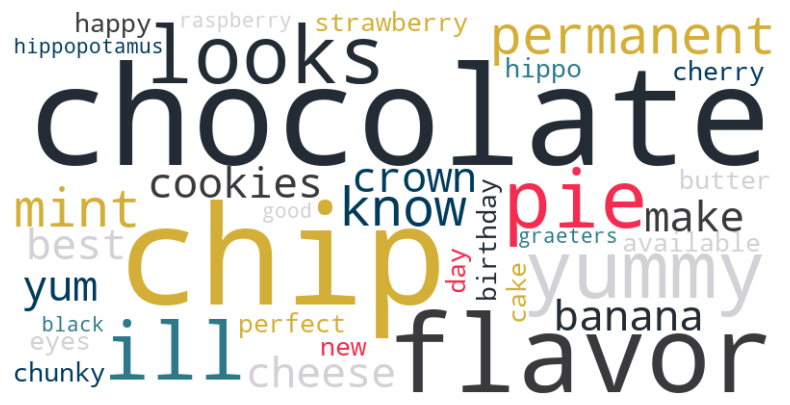

In [112]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# LDA topics
lda_topics = lda.components_

# Number of topics you want to select (you can change this)
topics_to_include = [0, 2]  # For example, selecting topics 1 and 3 (indices 0 and 2)

# Create a list for the words from the selected topics
selected_words = []

for topic_idx in topics_to_include:
    # For each selected topic, get the top 20 most important words
    top_words = [vectorizer.get_feature_names_out()[i] for i in lda_topics[topic_idx].argsort()[-20:]]
    selected_words.extend(top_words)

# Convert the selected words into a single text string
text = ' '.join(selected_words)

# Generate the word cloud
  #RGB codes
colors = ['#3A3A3C', '#D1D1D6', '#D4AF37', '#003B5C', '#F42C50', '#2C7A89', '#232C35']
#Create personalized colormap
custom_colormap = ListedColormap(colors)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap = custom_colormap).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()
